In [1]:
# !git clone https://www.github.com/dmc27/ai2023.git

In [1]:
# import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ai2023.imutils import imshow
from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
img_rgb = cv2.cvtColor(cv2.imread('ai2023/1600.png'), cv2.COLOR_BGR2RGB)
img_rgb_crop = cv2.cvtColor(cv2.imread('ai2023/1600.crop.png'), cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(cv2.imread('ai2023/1600.png'), cv2.COLOR_BGR2HSV)
img_hsv_crop = cv2.cvtColor(cv2.imread('ai2023/1600.crop.png'), cv2.COLOR_BGR2HSV)

img_lab = cv2.cvtColor(cv2.imread('ai2023/1600.png'), cv2.COLOR_BGR2LAB)
img_lab_crop = cv2.cvtColor(cv2.imread('ai2023/1600.crop.png'), cv2.COLOR_BGR2LAB)

(array([12828.,  2692.,  3362.,  3349.,  6236., 14540., 18050.,  8568.,
         8076., 11736., 11657., 10856.,  7543.,  8337.,  5768.,  6404.,
         5761.,  4444.,  5276.,  3922.,  6997.,  5452.,  8203.,  5213.,
         3734.,  1705.,  1001.,  1019.,   702.,   792.,   874.,   841.,
          669.,  1105.,  1773.,  1347.,  1112.,   448.,   402.,   300.,
          458.,   289.,   673.,  8286., 15049., 29674.,  3848.,   417.,
          134.,   222.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

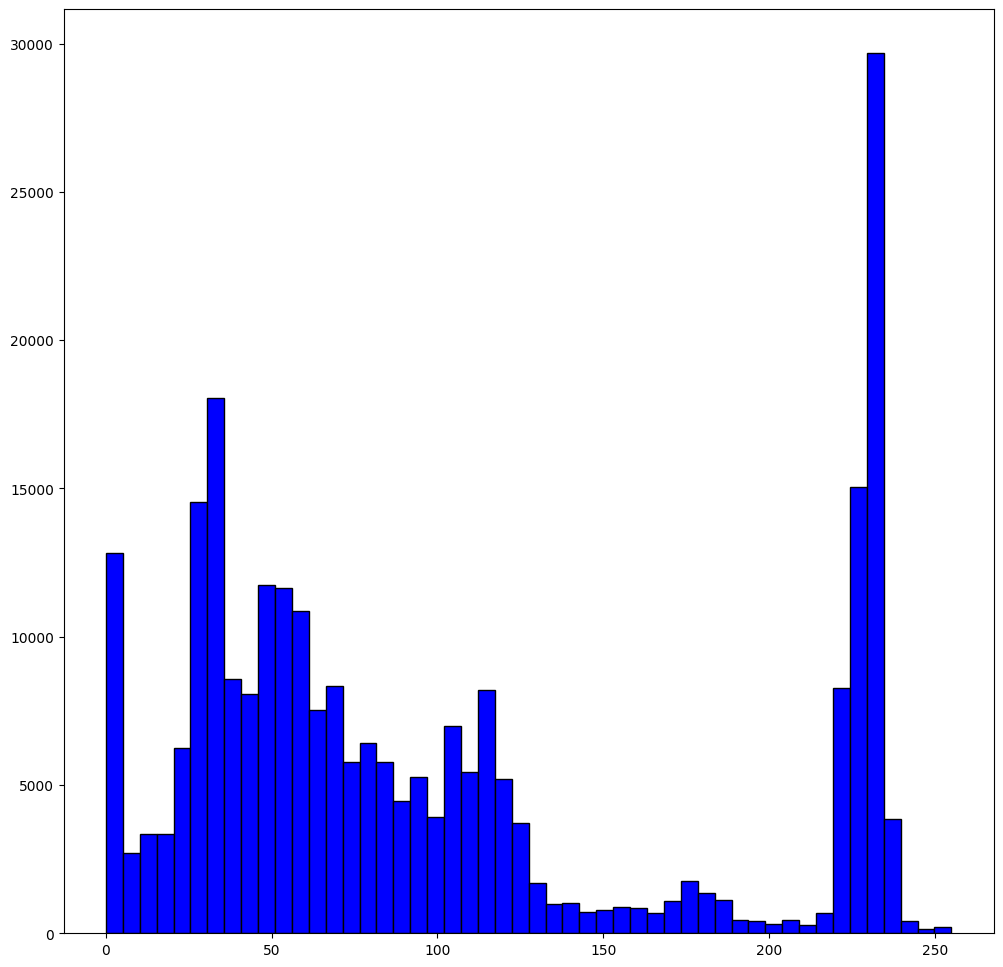

In [34]:
plt.figure(figsize = [12, 12])
plt.hist(img_rgb[:, :, 2].ravel(), bins= 50, edgecolor = 'black', color = 'b')

In [3]:
# img_rgb = img_rgb / 255.

In [4]:
def maximum_likelihood(x, train_rgb, d, prob):
    mu = np.mean(train_rgb, axis = 0)
    covariance = np.cov(train_rgb, rowvar = False)
    temp = x - mu
    gx = -0.5 * np.dot(np.dot(temp, np.linalg.inv(covariance)), temp) - d/2 * np.log(2 * np.pi) - 1/2 * np.log(np.linalg.det(covariance)) + np.log(prob)
    return gx

In [5]:
def euclidean_dist(x, train_rgb):
    mu = np.mean(train_rgb, axis = (0, 1))
    temp = x - mu
    eucl = np.dot(temp, temp)
    return eucl ** 0.5

In [6]:
def mahalanobis_dist(x, train_rgb):
    mu = np.mean(train_rgb, axis = (0, 1))
    cov = np.cov(train_rgb, rowvar=False)
    temp = x - mu
    mahalanobis = np.dot(np.dot(temp, np.linalg.inv(cov)), temp)
    return mahalanobis ** 0.5

In [7]:
num_rows, num_cols = img_rgb.shape[0], img_rgb.shape[1]

In [28]:
img_rgb_out = img_rgb.copy()
rgb_euc_dist = []
for r in tqdm(range(0, num_rows)):
  for c in range(0, num_cols):
    euc_dist = euclidean_dist(img_rgb[r, c], img_rgb_crop)
    rgb_euc_dist.append(euc_dist)

    if euc_dist < 280. and euc_dist > 260.:
      img_rgb_out[r, c] = img_rgb[r, c]
    else:
      img_rgb_out[r, c]= np.array([0, 0, 0], dtype=np.uint8)

100%|██████████| 512/512 [00:21<00:00, 23.83it/s]


(array([9.1000e+01, 2.3200e+02, 4.7500e+02, 7.3700e+02, 9.4500e+02,
        2.0070e+03, 6.8250e+03, 4.5780e+03, 3.3520e+03, 2.5840e+03,
        2.0130e+03, 2.0200e+03, 1.8000e+03, 1.5390e+03, 1.3700e+03,
        1.3340e+03, 1.0810e+03, 9.4300e+02, 9.6200e+02, 8.5600e+02,
        6.8000e+02, 7.4700e+02, 7.3200e+02, 6.4700e+02, 6.5200e+02,
        6.6800e+02, 6.8600e+02, 5.9300e+02, 6.6100e+02, 6.7000e+02,
        6.4200e+02, 6.0000e+02, 7.0100e+02, 7.9900e+02, 8.0200e+02,
        9.2200e+02, 1.2150e+03, 1.5520e+03, 2.1950e+03, 3.6510e+03,
        9.0570e+03, 1.7889e+04, 2.0164e+04, 1.8614e+04, 1.4594e+04,
        1.0716e+04, 8.2740e+03, 8.3650e+03, 6.0010e+03, 4.3180e+03,
        3.3620e+03, 3.4350e+03, 8.0910e+03, 5.0070e+03, 8.6700e+02,
        6.5600e+02, 7.0400e+02, 7.3700e+02, 7.4100e+02, 9.0900e+02,
        9.0500e+02, 7.1000e+02, 7.3400e+02, 5.7800e+02, 4.7900e+02,
        3.6000e+02, 2.6800e+02, 1.9600e+02, 1.9200e+02, 1.9100e+02,
        1.5100e+02, 1.6500e+02, 1.5000e+02, 1.60

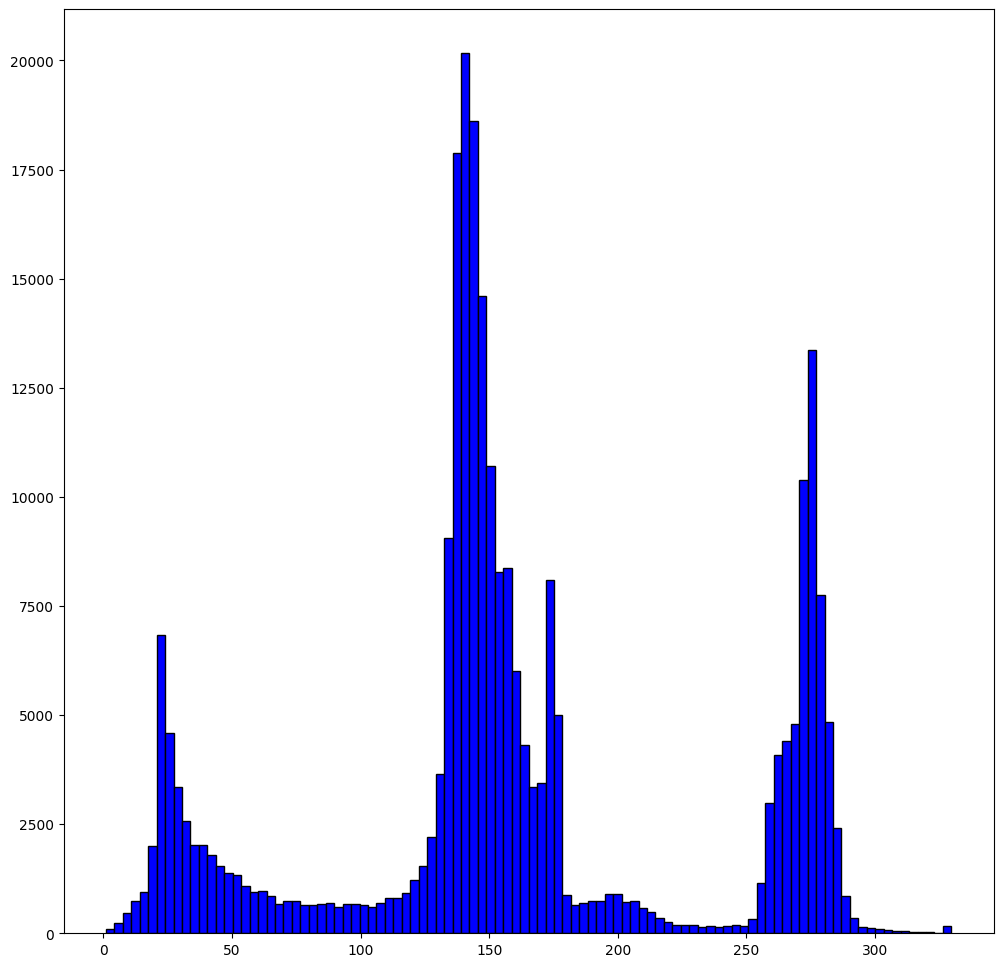

In [30]:
plt.figure(figsize = [12, 12])
plt.hist(rgb_euc_dist, bins= 100, edgecolor = 'black', color = 'b')

1. As we can see that from the histogram above, it is a multimodel distribution with 3 peaks, meaning that at least there are 3 classes in the image 1600.jpg

In [18]:
img_hsv_out = img_hsv.copy()
hsv_euc_dist = []
for r in tqdm(range(0, num_rows)):
  for c in range(0, num_cols):
    euc_dist = euclidean_dist(img_hsv[r, c], img_hsv_crop)
    hsv_euc_dist.append(euc_dist)

    if euc_dist < 85.:
      img_hsv_out[r, c] = img_hsv[r, c]
    else:
      img_hsv_out[r, c] = np.array([0, 0, 0], dtype=np.uint8)

100%|██████████| 512/512 [00:23<00:00, 22.17it/s]


(array([4.0500e+02, 1.1790e+03, 2.0610e+03, 1.3128e+04, 5.0360e+03,
        3.4040e+03, 2.7110e+03, 2.3630e+03, 1.7510e+03, 1.2180e+03,
        9.5800e+02, 9.4300e+02, 8.7000e+02, 1.0220e+03, 1.8380e+03,
        2.2710e+03, 2.7240e+03, 3.1780e+03, 3.9160e+03, 4.6060e+03,
        5.2470e+03, 5.0180e+03, 5.1220e+03, 5.4050e+03, 7.1960e+03,
        1.1401e+04, 1.7650e+04, 3.8161e+04, 3.2501e+04, 1.8840e+04,
        1.3435e+04, 7.9830e+03, 1.0420e+04, 4.3420e+03, 4.2010e+03,
        3.2890e+03, 2.8120e+03, 2.4710e+03, 2.1510e+03, 1.8920e+03,
        1.5310e+03, 1.0870e+03, 8.4100e+02, 3.1100e+02, 2.0900e+02,
        1.5900e+02, 6.2000e+01, 5.9000e+01, 2.7000e+01, 2.7390e+03]),
 array([  0.39148465,   7.12860072,  13.86571679,  20.60283286,
         27.33994893,  34.077065  ,  40.81418107,  47.55129713,
         54.2884132 ,  61.02552927,  67.76264534,  74.49976141,
         81.23687748,  87.97399355,  94.71110962, 101.44822569,
        108.18534176, 114.92245783, 121.6595739 , 128.39668997

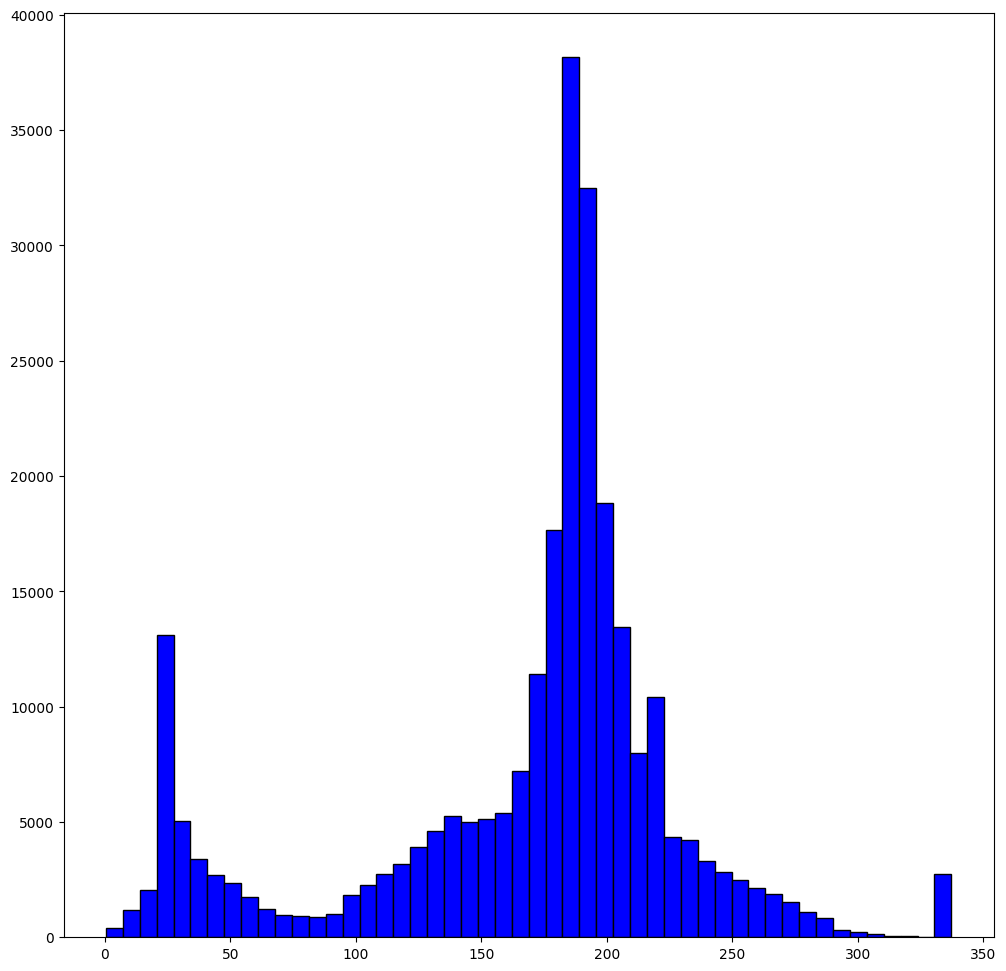

In [19]:
plt.figure(figsize = [12, 12])
plt.hist(hsv_euc_dist, bins= 50, edgecolor = 'black', color = 'b')

In [20]:
img_lab_out = img_lab.copy()
lab_euc_dist = []
for r in tqdm(range(0, num_rows)):
  for c in range(0, num_cols):
    euc_dist = euclidean_dist(img_lab[r, c], img_lab_crop)
    lab_euc_dist.append(euc_dist)

    if euc_dist < 55.:
      img_lab_out[r, c] = img_lab[r, c]
    else:
      img_lab_out[r, c] = np.array([0., 128., 128.])

100%|██████████| 512/512 [00:25<00:00, 19.77it/s]


(array([  433.,  2324.,  8242.,  5099.,  5185.,  3307.,  3174.,  2735.,
         2070.,  2097.,  1544.,  1429.,  1255.,  1231.,  1039.,  1023.,
         1053.,  1073.,  1404.,  2022.,  5208., 19028., 40659., 29209.,
        11509.,  7497.,  5944.,  4631.,  4617.,  4777.,  5157.,  4871.,
        11003.,   409.,   380.,   291.,   333.,   554.,  2938.,  5462.,
         8814., 17998., 15731.,  5700.,   938.,   251.,   156.,    91.,
           71.,   178.]),
 array([  0.63564017,   4.09768904,   7.5597379 ,  11.02178677,
         14.48383563,  17.94588449,  21.40793336,  24.86998222,
         28.33203109,  31.79407995,  35.25612881,  38.71817768,
         42.18022654,  45.64227541,  49.10432427,  52.56637313,
         56.028422  ,  59.49047086,  62.95251973,  66.41456859,
         69.87661746,  73.33866632,  76.80071518,  80.26276405,
         83.72481291,  87.18686178,  90.64891064,  94.1109595 ,
         97.57300837, 101.03505723, 104.4971061 , 107.95915496,
        111.42120383, 114.8832

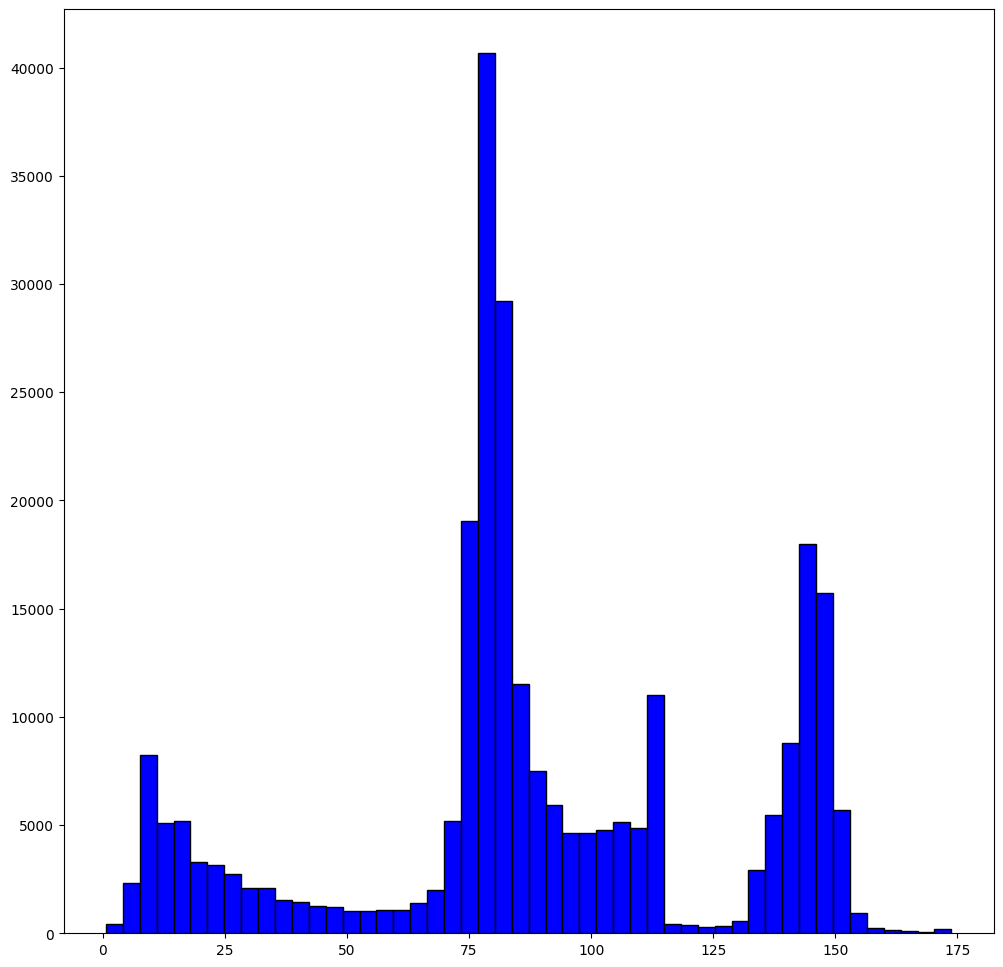

In [21]:
plt.figure(figsize = [12, 12])
plt.hist(lab_euc_dist, bins= 50, edgecolor = 'black', color = 'b')

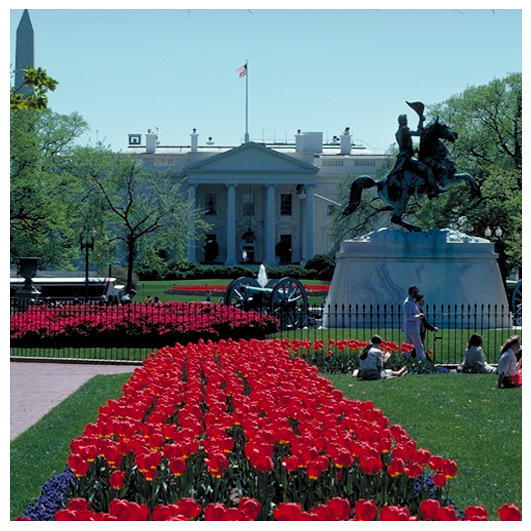

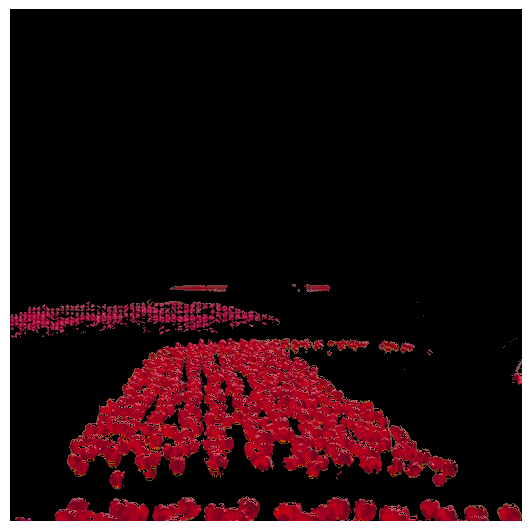

In [48]:
imshow(img_rgb)
imshow(cv2.cvtColor(img_lab_out, cv2.COLOR_LAB2RGB))

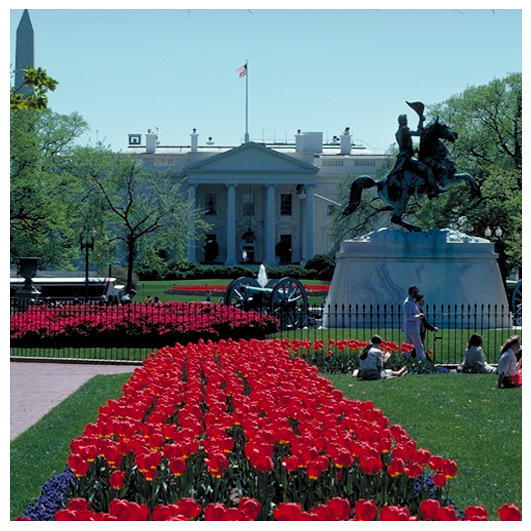

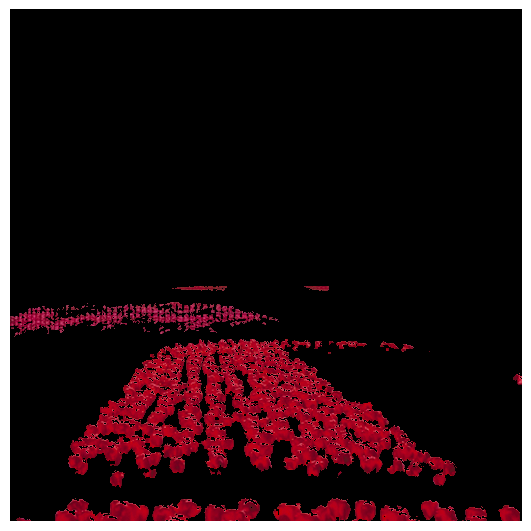

In [16]:
imshow(img_rgb)
imshow(cv2.cvtColor(img_hsv_out, cv2.COLOR_HSV2RGB))

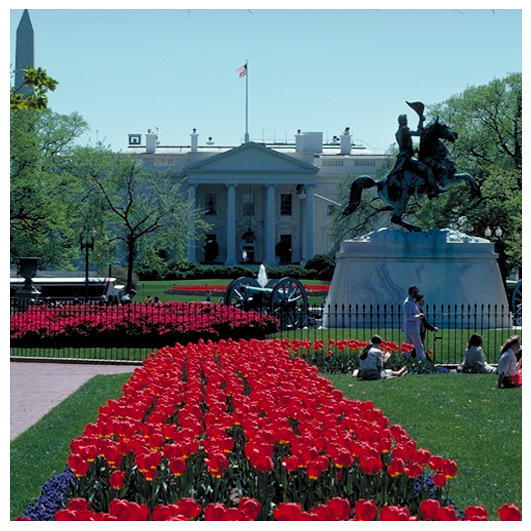

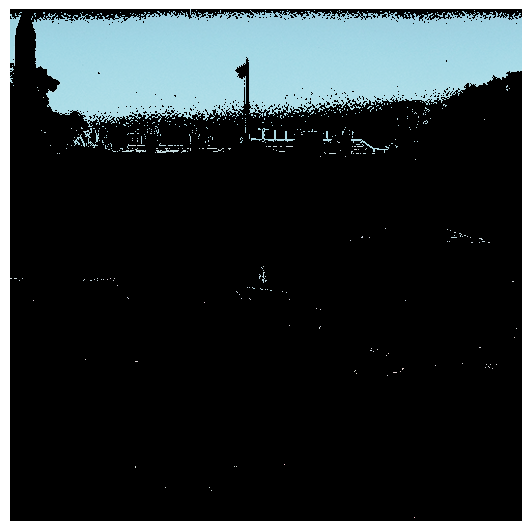

In [29]:
imshow(img_rgb)
imshow(img_rgb_out)

In [4]:
kmeans = KMeans(n_clusters = 3, n_init = 20)
kmeans.fit(img_rgb.reshape(-1, 3))

KMeans(n_clusters=3, n_init=20)

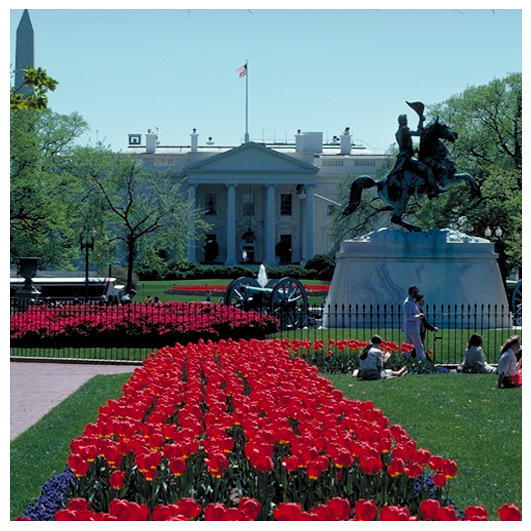

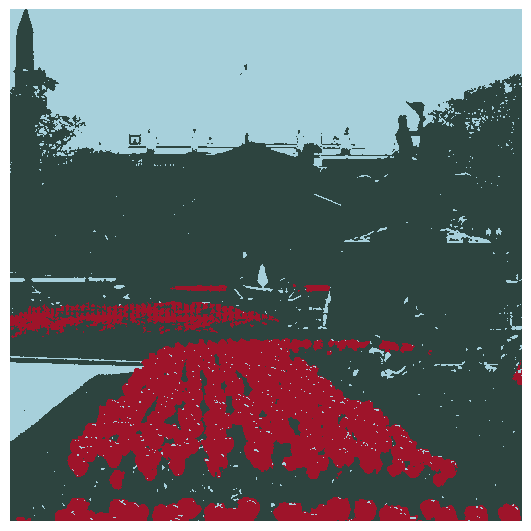

In [5]:
imshow(img_rgb)
seg_rgb_vals = kmeans.cluster_centers_[kmeans.labels_]

seg_img = seg_rgb_vals.reshape(img_rgb.shape)
imshow(seg_img.astype(np.uint8))